# Explore here

                     name  popularity  duration
0  The Dirt I'm Buried In          55      4.08
1     Hail the Apocalypse          52      4.23
2    The Eagle Has Landed          46      5.03


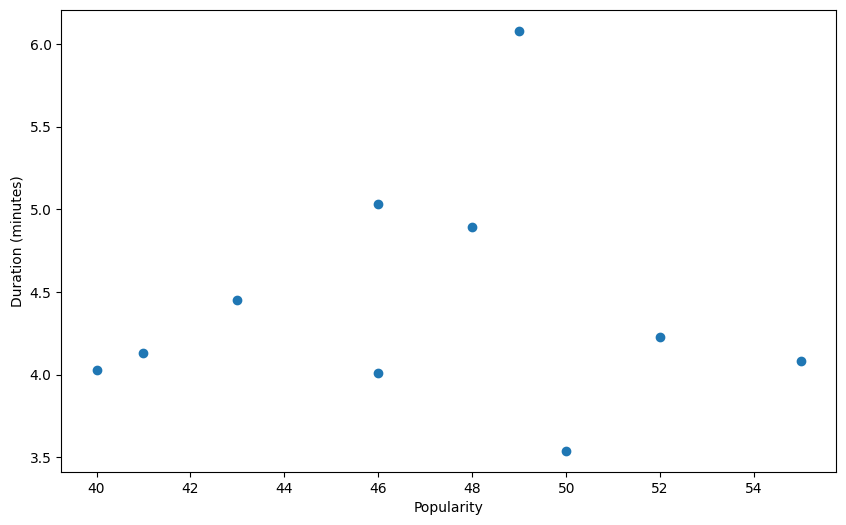

Don't exist a statistical relationship between popularity and duration of the songs


In [1]:
import os
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt


from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')
artist_id = os.getenv('ARTIST_ID')
scope = os.getenv('SCOPE') # 'user-library-read'
redirect_uri = os.getenv('REDIRECT_URI') # 'http://localhost:8888/callback'

if not client_id or not client_secret:
    raise ValueError("Please set the CLIENT_ID and CLIENT_SECRET environment variables.")

spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                    client_secret=client_secret,
                                                    redirect_uri=redirect_uri,
                                                    scope=scope))

# Get the artist's top tracks
top_tracks = spotify.artist_top_tracks(artist_id, country='US')
top_tracks = [ {'name': track['name'], 'popularity': track['popularity'], 'duration': track['duration_ms'] / 60000 } for track in top_tracks['tracks']]

#   Step 6: Transform to Pandas DataFrame

df = pd.DataFrame(top_tracks)
df['duration'] = df['duration'].round(2)
print(df.head(3).sort_values(by='popularity', ascending=False))

# Step 7: Analyze statistical relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['duration'])
plt.xlabel('Popularity')
plt.ylabel('Duration (minutes)')
plt.show()

correlation = df['popularity'].corr(df['duration'])

if correlation > 0.5:
    print('There is a positive correlation between popularity and duration of the songs')
else:
    print('Don\'t exist a statistical relationship between popularity and duration of the songs')